<a href="https://colab.research.google.com/github/RuchitaSalunkhe/OIBSIP_Car_Price_prediction_with_ML/blob/main/Task_3_Car_Price_Pridiction_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving CarPrice.csv to CarPrice.csv


In [ ]:
df = pd.read_csv('CarPrice.csv')


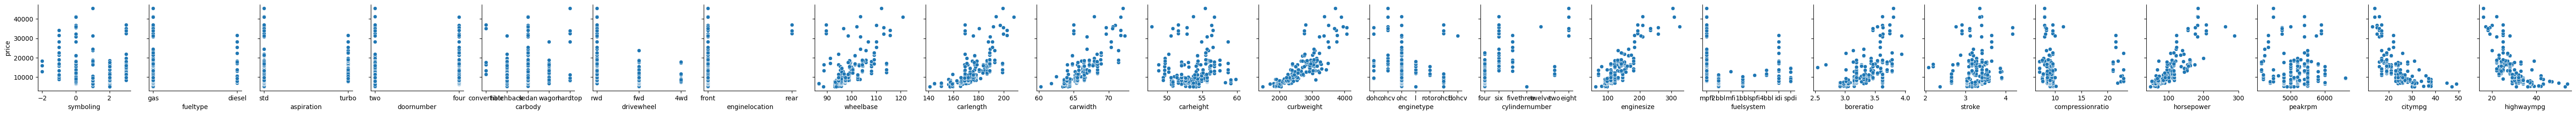

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('CarPrice.csv')

# Drop columns that are not needed for visualization
df_visual = df.drop(['car_ID', 'CarName'], axis=1)

# Pairplot for numerical features and target variable
sns.pairplot(df_visual, x_vars=df_visual.columns.drop('price'), y_vars='price', diag_kind='kde')
plt.show()




<ipython-input-14-845e6f87f1a2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_visual.corr()


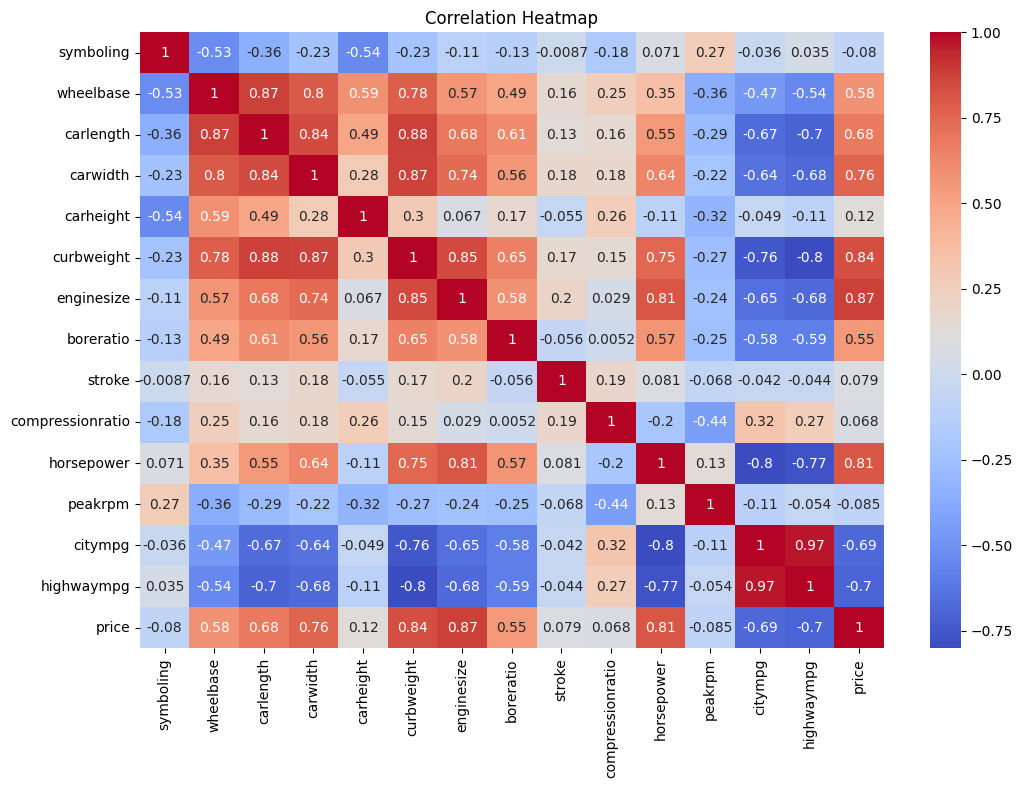

In [ ]:
# Heatmap for correlation matrix
correlation_matrix = df_visual.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

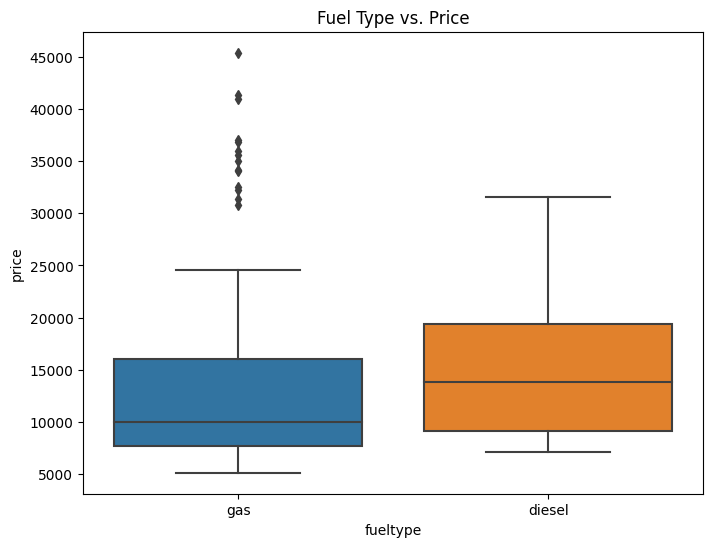

In [ ]:
# Boxplot for fuel type vs. price
plt.figure(figsize=(8, 6))
sns.boxplot(x='fueltype', y='price', data=df)
plt.title('Fuel Type vs. Price')
plt.show()

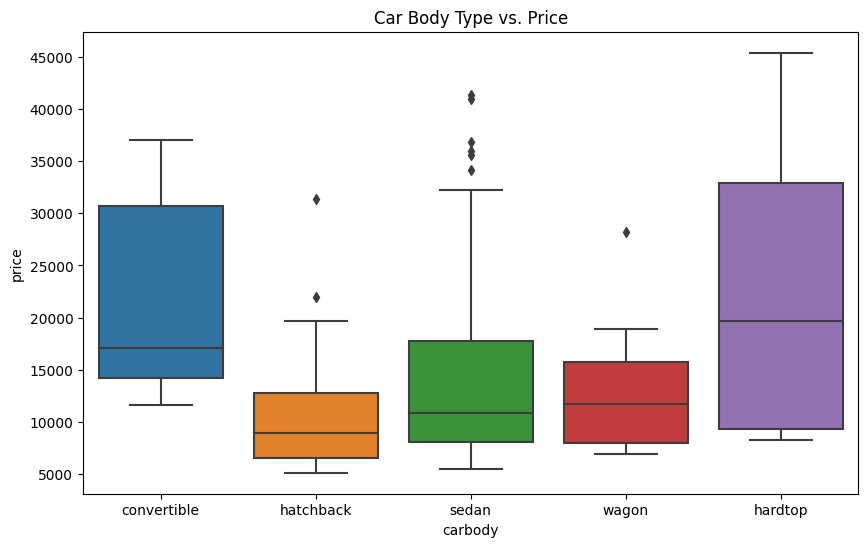

In [ ]:
# Boxplot for car body type vs. price
plt.figure(figsize=(10, 6))
sns.boxplot(x='carbody', y='price', data=df)
plt.title('Car Body Type vs. Price')
plt.show()

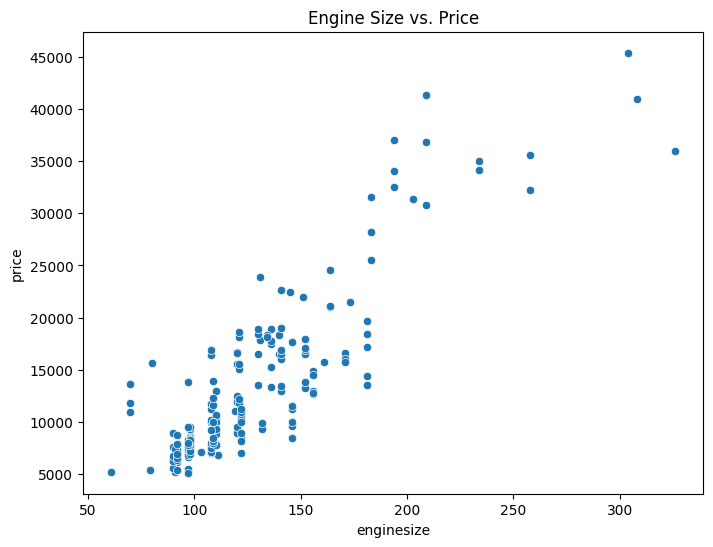

In [ ]:
# Scatter plot for engine size vs. price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='enginesize', y='price', data=df)
plt.title('Engine Size vs. Price')
plt.show()

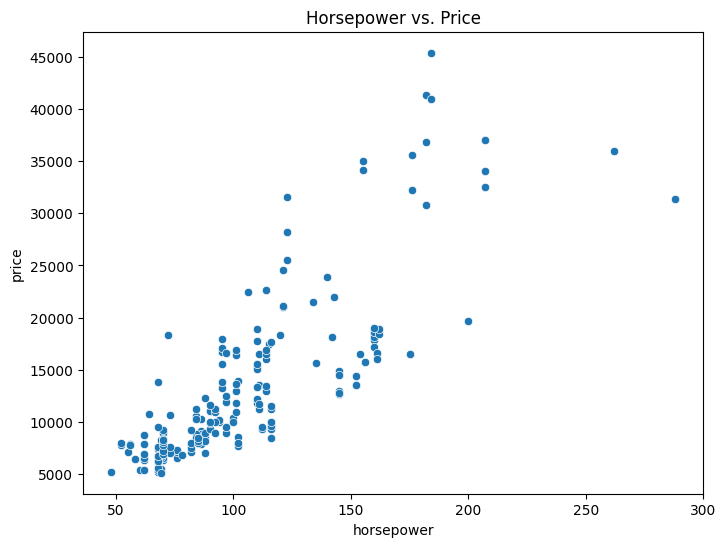

In [ ]:
# Scatter plot for horsepower vs. price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='horsepower', y='price', data=df)
plt.title('Horsepower vs. Price')
plt.show()

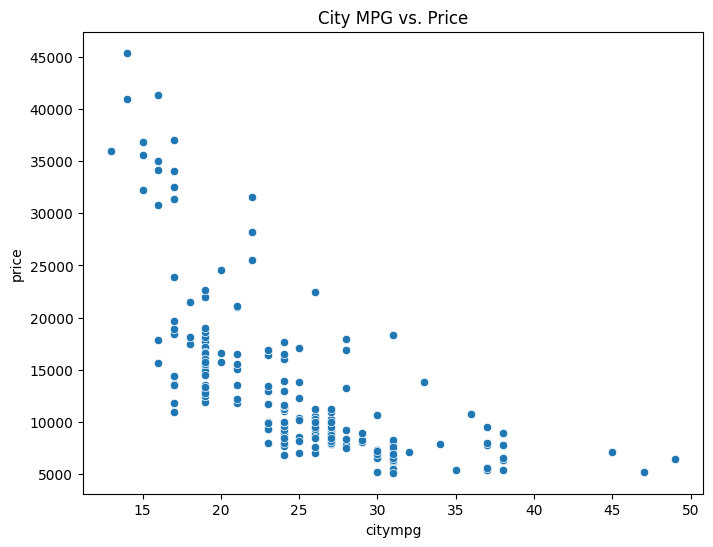

In [ ]:
# Scatter plot for city mpg vs. price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='citympg', y='price', data=df)
plt.title('City MPG vs. Price')
plt.show()


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Explore the statistics of the numerical features
print(df.describe())

# Explore the correlation between features and the target variable
correlation_matrix = df.corr()
print(correlation_matrix['price'].sort_values(ascending=False))

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64
           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52

<ipython-input-8-cf680b993039>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [ ]:
# Drop columns that are not needed for prediction
df = df.drop(['car_ID', 'CarName'], axis=1)

# Convert categorical variables into numerical representations (one-hot encoding)
df = pd.get_dummies(df, drop_first=True)

# Split the data into features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Squared Error: 8482008.48437192
Root Mean Squared Error: 2912.3887934772583
R-squared: 0.8925566700320231


In [ ]:
# If you want to try other models, you can use hyperparameter tuning here.
# For example, for Random Forest Regression:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its performance
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Best Random Forest Model:", best_rf_model)
print("Mean Squared Error (Random Forest):", mse_rf)
print("Root Mean Squared Error (Random Forest):", rmse_rf)
print("R-squared (Random Forest):", r2_rf)


Best Random Forest Model: RandomForestRegressor(random_state=42)
Mean Squared Error (Random Forest): 3313969.6412752494
Root Mean Squared Error (Random Forest): 1820.4311690572783
R-squared (Random Forest): 0.9580212712204378
